<a href="https://colab.research.google.com/github/gabivoicu/Accountabill/blob/master/Copy_of_Cannonball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trajectory with air resistance

\Many elementary mechanics problems deal with the physics of objects
moving or flying through the air, but they almost always ignore friction
and air resistance to make the equations solvable.  If we're using a
computer, however, we don't need solvable equations.

Consider, for instance, a spherical cannonball shot from a cannon standing
on level ground.  The air resistance on a moving sphere is a force in the
opposite direction to the motion with magnitude

$F = \frac{1}{2} \pi R^2\rho C v^2$

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the
velocity, and $C$ is the so-called *coefficient of drag* (a
property of the shape of the moving object, in this case a sphere). Starting from Newton's second law, $F=ma$, it can be shown that the
  equations of motion for the position $(x,y)$ of the cannonball are

$
\ddot{x} = - {\pi R^2\rho C\over2m}\,
             \dot{x}\sqrt{\dot{x}^2+\dot{y}^2},
\qquad
\ddot{y} =  - g - {\pi R^2\rho C\over2m}\,
             \dot{y}\sqrt{\dot{x}^2+\dot{y}^2},
$

where $m$ is the mass of the cannonball, $g$ is the acceleration due to
gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives
of $x$ with respect to time.

##A.
 Change these two second-order equations into four first-order
  equations using the methods you have learned, then write a program that
  solves the equations for a cannonball of mass $1\,$kg and radius $8\,$cm,
  shot at $30^\circ$ to the horizontal with initial velocity
  $100\,\mathrm{ms}^{-1}$.  The density of air is
  $\rho=1.22\,\textrm{kg}\,\textrm{m}^{-3}$ and the coefficient of drag for
  a sphere is $C=0.47$.  Make a plot of the trajectory of the cannonball
  (i.e., a graph of $y$ as a function of $x$).  Although you don't know the time it will take for the cannonball to hit the ground, you can get a pretty good estimate with some guess and check, or you may want to modify our program from class to only run for as along as the y-coordinate has a positive value.  You should get a horizontal distance between 200 and 300 meters.

# Solution

This program is going to use the Range-Kutta method to transform the given equations for the purpose of finding the x and y components of a cannonball trajectory with air resistance. This program is also going to investigate the difference in trajectory between cannonballs of different masses.

One assumption I am making is that the cannonball is shot from a position of (0, 0) and cannot go below ground or in the negative x direction so I am going to ignore negative values of x and y.

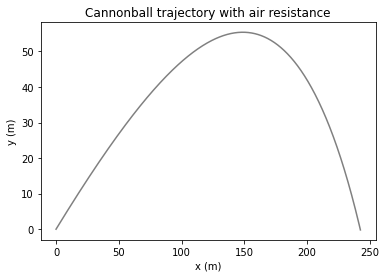

In [ ]:
# Import libraries for array functions and plotting
import numpy as np
import matplotlib.pyplot as plt

# Define the constants to be used from the equations provided
theta      = 30 * np.pi / 180 # initial angle to radian
v_initial  = 100 # m/s
vx_initial = v_initial * np.cos(theta) # x component of velocity
vy_initial = v_initial * np.sin(theta) # y component of velocity
x_initial  = 0
y_initial  = 0
t_initial  = 0.0
t_final    = 10.0
h          = 0.01 # experimented with multiple h values and settled on this one
g          = 9.81   # m/s^2
C          = 0.47   # coefficient of drag
R          = 0.08   # m
rho        = 1.22 # kg/m^3

# Define function for calculating the values of the differential equations
def f(r, constants_product):
  x = r[0]
  y = r[1]
  fx = r[2]
  fy = r[3]
  fxv = (-1) * constants_product * fx * np.sqrt(fx**2+fy**2)
  fyv = (-1*g) - constants_product * fy * np.sqrt(fx**2+fy**2)
  return np.array([fx, fy, fxv, fyv])

# Create method to calculate the trajectory of an object of given mass in kg
def cannonball_trajectory(mass):
  # Create arrays for the timestep values and the equation solutions filled with zeros
  t_points = np.arange(t_initial, t_final + h, h)
  r_points = np.zeros((len(t_points), 4))
  r_points[0,:] = [x_initial, y_initial, vx_initial, vy_initial]

  # Calculate product of constans to save time and to pass to f function
  constants_product = (np.pi * R**2 * rho * C) / (2.0 * mass)

  # Implement Runge-Kutta method for each value of t
  for i in range(1, len(t_points)):
    k1 = f(r_points[i-1,:], constants_product)
    k2 = f(r_points[i-1,:] + (h/2)*k1, constants_product)
    k3 = f(r_points[i-1,:] + (h/2)*k2, constants_product)
    k4 = f(r_points[i-1,:] + h*k3, constants_product)
    # Do not add negative values to array per decision in program description
    if (r_points[i-1,:][0] >= 0) and (r_points[i-1,:][1] >= 0):
      r_points[i, :] = r_points[i-1,:] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    else:
      break

  # Do not return the part of the array that is still filled with 0
  return r_points[:i]

result = cannonball_trajectory(1) # initial mass in kg
# Plot the y values as a function of x
plt.plot(result[:, 0], result[:, 1], 'grey')
plt.title('Cannonball trajectory with air resistance')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## B. 

When one ignores air resistance, the distance traveled by a
  projectile does not depend on the mass of the projectile.  In real life,
  however, mass certainly does make a difference.  Experiment with the program   above to determine
  whether the cannonball travels further if it is heavier or lighter.  You
  could, for instance, plot a series of trajectories for cannonballs of
  different masses, or you could make a graph of distance traveled as a
  function of mass.  Describe briefly what you discover.

We get that the cannonball goes further if it's heavier. This is because the drag force is independent of the cannonball's mass, so the heavier cannonballs with more momentum will have less change to their x-velocity and travel further.

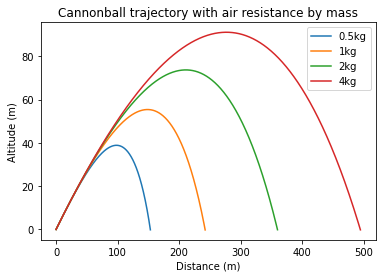

In [ ]:
mass_one_trajectory   = cannonball_trajectory(0.5)
mass_two_trajectory   = cannonball_trajectory(1.0)
mass_three_trajectory = cannonball_trajectory(2.0)
mass_four_trajectory  = cannonball_trajectory(4.0)

plt.plot(mass_one_trajectory[:, 0], mass_one_trajectory[:, 1])
plt.plot(mass_two_trajectory[:, 0], mass_two_trajectory[:, 1])
plt.plot(mass_three_trajectory[:, 0], mass_three_trajectory[:, 1])
plt.plot(mass_four_trajectory[:, 0], mass_four_trajectory[:, 1])
plt.plot()
plt.title('Cannonball trajectory with air resistance by mass')
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.legend(('0.5kg', '1kg', '2kg', '4kg'))
plt.show()

Based on the graphed trajectories, it is apparent that cannonballs of larger mass have trajectories where the max height reached is higher and the distance travelled on the x axis is greater. Since the coefficient of drag is the same for all cannonballs it makes sense that it would impact large cannonballs less than smaller ones.